**To do**
Lasso Regularization

Regression with Lasso Drop

Run Best Model on Test Data

Give Scores and ScatterPlots

# Layout:
1. Import Packages/Libraries
2. Read Data From Previous Scrape
3. Clean + Feature Engineer Data
    + Drop Duplicates
    + Set Column Values From Object to Respective Values
    + Turn Categorical Data into 0/1 Variables
    + Drop Movies
4. Split into Train and Test Set
5. EDA on Training Set
    + Pairplot
    + Correlations
6. Base Model- Patsy
7. Diagnostic Plots
8. Scale/Normalize Values
    + Log Dependent Variable- Success
    + Boxcox- Fail 
9. EDA Scaled Values
10. Regression on Logged Values
11. Diagnostic Plots on Logged Values
12. Drop Outliers
13. Lasso Regularization
14. Regression with Lasso Drop

**Don't Log/Polynomial Independent Variables as there are no Visible Relations**


15. Measure More Advanced Models
16. Run Best Model on Test Data
17. Give Scores and ScatterPlots

# Mass Importation

In [1]:
import pandas as pd
import numpy as np
import dateutil.parser
from datetime import date
import re

from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from scipy import stats
from sklearn import linear_model,ensemble, tree, model_selection, datasets

import diagnostic_plots

import pickle
import time

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read Dataset from Scrape

In [2]:
df=pd.read_csv('steam3.csv')
del(df['Unnamed: 0'])
df.set_index('title', inplace=True)
df.head()

,link,system,systems,reviews,release_date,discount,price
title,,,,,,,
Warframe,https://store.steampowered.com/app/230410/Warf...,1,['win'],192592,1940,0,0.00
Clicker Heroes 2,https://store.steampowered.com/app/629910/Clic...,2,"['win', 'mac']",183,1,0,29.99
Tom Clancy's Rainbow Six® Siege,https://store.steampowered.com/app/359550/Tom_...,1,['win'],170518,959,0,14.99
Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,3,"['win', 'mac', 'linux']",2628652,2156,0,14.99
Grand Theft Auto V,https://store.steampowered.com/app/271590/Gran...,1,['win'],343780,1191,34,29.99


# Clean Data and Add Dummy Features

Remove Duplicates

In [3]:
no_dup_df = df[~df.index.duplicated(keep='first')]

Set Column Value Types

In [4]:
no_dup_df['system'] = no_dup_df.system.astype(int)
no_dup_df['reviews'] = no_dup_df.reviews.astype(int)
no_dup_df['release_date'] = no_dup_df.release_date.astype(int)
no_dup_df['discount'] = no_dup_df.discount.astype(int)
no_dup_df['price'] = no_dup_df.price.astype(float)
no_dup_df['systems'] = no_dup_df.systems.astype(list)

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

## Windows, Mac, Linux -> Dummy Variables

In [7]:
windows=[1 if 'win' in item else 0 for item in no_dup_df.systems]
mac=[1 if 'mac' in item else 0 for item in no_dup_df.systems]
linux=[1 if 'linux' in item else 0 for item in no_dup_df.systems]

In [8]:
no_dup_df['windows']=windows
no_dup_df['mac']=mac
no_dup_df['linux']=linux

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [9]:
no_dup_df['windows'] = no_dup_df.windows.astype(int)
no_dup_df['mac'] = no_dup_df.mac.astype(int)
no_dup_df['linux'] = no_dup_df.linux.astype(int)
#no_dup_df.info()

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

## Drop Movies

In [56]:
make a cut of a million

no_dup_df.loc['Counter-Strike: Global Offensive']
sorted(no_dup_df.reviews, reverse=True)

[2628652,
 909458,
 709967,
 343780,
 311613,
 278137,
 202586,
 192592,
 180137,
 178352,
 173318,
 170518,
 157263,
 151230,
 144891,
 133477,
 114536,
 104770,
 102240,
 91801,
 90921,
 85576,
 83620,
 82049,
 81082,
 80481,
 78296,
 72880,
 70980,
 68969,
 66363,
 65935,
 61731,
 58453,
 57183,
 57179,
 56745,
 55197,
 54018,
 53618,
 52431,
 51915,
 48484,
 47602,
 47082,
 46956,
 46632,
 46032,
 45624,
 45518,
 45346,
 45147,
 44592,
 41976,
 41791,
 41482,
 41443,
 40404,
 39685,
 39484,
 38968,
 38584,
 37896,
 37836,
 37600,
 36096,
 36051,
 35770,
 35596,
 35451,
 34648,
 33912,
 33381,
 32767,
 32663,
 31908,
 31227,
 30858,
 30465,
 30001,
 29699,
 29454,
 29204,
 29004,
 28851,
 28826,
 28776,
 28739,
 28295,
 28068,
 28022,
 27708,
 27385,
 27061,
 26980,
 26625,
 25946,
 25946,
 25819,
 25642,
 25440,
 25101,
 25068,
 24799,
 24551,
 23470,
 23440,
 23435,
 23102,
 23044,
 22932,
 22608,
 22440,
 22329,
 22123,
 22115,
 21643,
 21413,
 21334,
 21206,
 20922,
 20875,
 207

In [10]:
movies=[]
for i in range(len(no_dup_df['systems'])):
    element=(no_dup_df['systems'][i])
    if 'win' not in element and 'mac' not in element and 'linux' not in element:
        movies.append(1)
    else:
        movies.append(0)
no_dup_df['movies']=movies
no_dup_df = no_dup_df[no_dup_df.movies != 1]
del(no_dup_df['movies'])

/Users/mayamadhavan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Split Data into Train/Test

In [11]:
y = no_dup_df['reviews']
X = no_dup_df.drop(['reviews','link','systems'], axis = 1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
traindf=X_train.join(y_train)

# Exploratory Data Analysis on Train Data

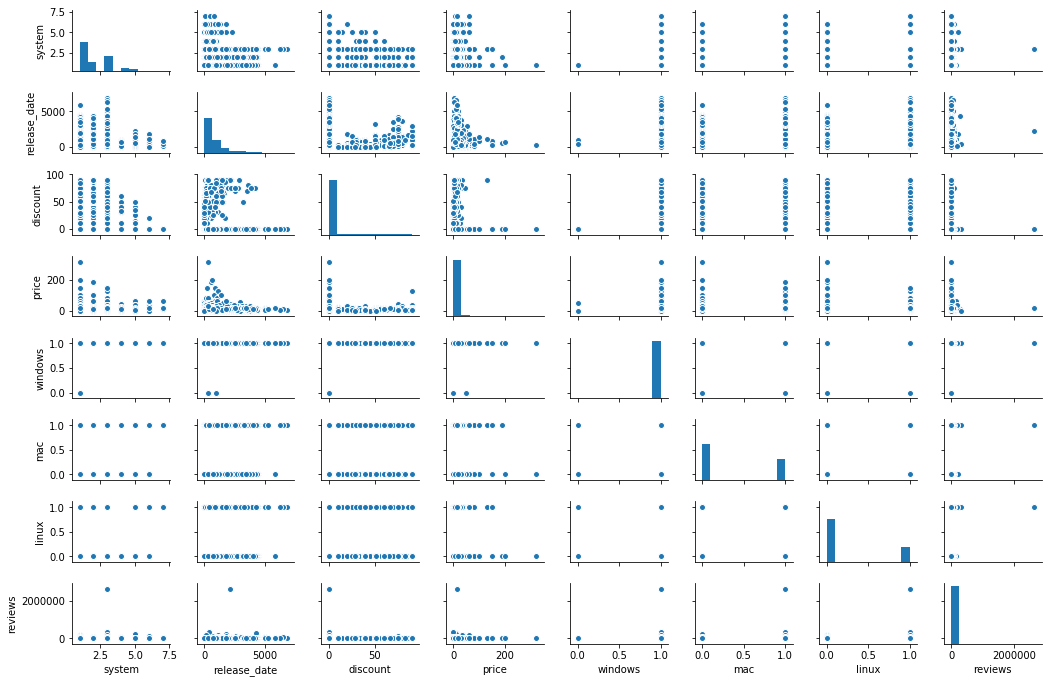

In [13]:
sns.pairplot(traindf, size = 1.2, aspect=1.5)

In [14]:
traindf.corr()
#sns.heatmap(no_dup_df.corr(), cmap="seismic")

,system,release_date,discount,price,windows,mac,linux,reviews
system,1.000000,-0.076072,-0.030427,0.050692,0.016206,0.503702,0.539203,0.024778
release_date,-0.076072,1.000000,-0.011964,0.061180,0.003233,0.081396,0.052620,0.054542
discount,-0.030427,-0.011964,1.000000,-0.025499,0.004365,0.001280,0.012985,-0.004339
price,0.050692,0.061180,-0.025499,1.000000,-0.025912,0.023462,0.022967,0.036431
windows,0.016206,0.003233,0.004365,-0.025912,1.000000,-0.005006,-0.010482,0.001078
mac,0.503702,0.081396,0.001280,0.023462,-0.005006,1.000000,0.658610,0.035747
linux,0.539203,0.052620,0.012985,0.022967,-0.010482,0.658610,1.000000,0.045466
reviews,0.024778,0.054542,-0.004339,0.036431,0.001078,0.035747,0.045466,1.000000


# Base Model

In [15]:
model = sm.OLS(y_train, sm.add_constant(X_train))
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                reviews   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.600
Date:                Wed, 18 Jul 2018   Prob (F-statistic):           3.86e-05
Time:                        17:34:38   Log-Likelihood:                -64937.
No. Observations:                5443   AIC:                         1.299e+05
Df Residuals:                    5435   BIC:                         1.299e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5867.5787    2.6e+04     -0.225      0.822   -5.69e+04    4.51e+04
system         161.9723    545.756      0.297      0.767    -907.928    1231.873
release_date     2.1135      0.574      3.684      0.000       0.989       3.238
discount        -9.0573     37.709     -0.240      0.810     -82.982      64.868
price          103.4989     43.773      2.364      0.018      17.687     189.311
windows       4007.9982    2.6e+04      0.154      0.878    -4.7e+04     5.5e+04
mac            323.1972   1414.234      0.229      0.819   -2449.268    3095.662
linux         3077.8245   1595.078      1.930      0.054     -49.167    6204.816
==============================================================================
Omnibus:                    19045.268   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5140139497.883
Skew:                          66.999   Prob(JB):                         0.00
Kurtosis:                    4761.848   Cond. No.                     8.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Diagnostic Plots

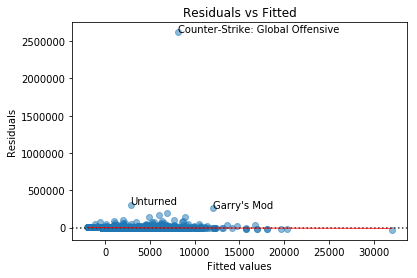

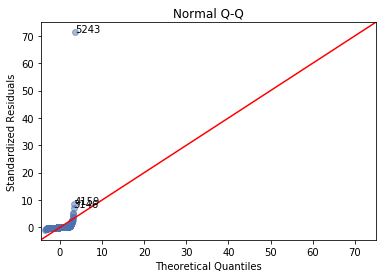

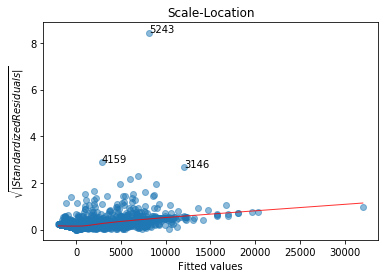

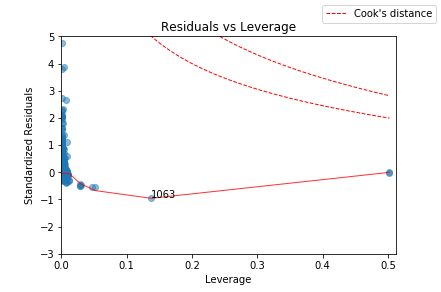

In [16]:
y_traindf=pd.DataFrame(y_train)
X_traindf=pd.DataFrame(X_train)
diagnostic_plots.diagnostic_plots(X_traindf, y_traindf, fit)

# Rescale/Normalize Data

Log Data

(array([1.418e+03, 6.180e+02, 1.174e+03, 9.280e+02, 6.580e+02, 3.990e+02,
        1.950e+02, 4.600e+01, 6.000e+00, 1.000e+00]),
 array([ 0.        ,  1.47819821,  2.95639642,  4.43459463,  5.91279284,
         7.39099105,  8.86918926, 10.34738747, 11.82558568, 13.3037839 ,
        14.78198211]),
 <a list of 10 Patch objects>)

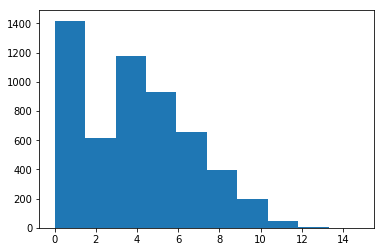

In [40]:
traindf['log_reviews'] = np.log(traindf.reviews + 1)
plt.hist(traindf['log_reviews'])

Boxcox- F

In [41]:
yt, _ = stats.boxcox(traindf['reviews']+1)

(array([1.418e+03, 0.000e+00, 1.255e+03, 8.980e+02, 8.070e+02, 5.830e+02,
        3.460e+02, 1.170e+02, 1.800e+01, 1.000e+00]),
 array([ 0.        ,  1.1458034 ,  2.2916068 ,  3.4374102 ,  4.5832136 ,
         5.729017  ,  6.8748204 ,  8.0206238 ,  9.16642719, 10.31223059,
        11.45803399]),
 <a list of 10 Patch objects>)

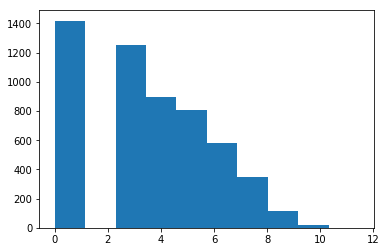

In [42]:
plt.hist(yt)

Remove Outliers

In [47]:
no_out_train=traindf.drop(index="Counter-Strike: Global Offensive")

# EDA Scaled Data, Log Reviews as Dependent

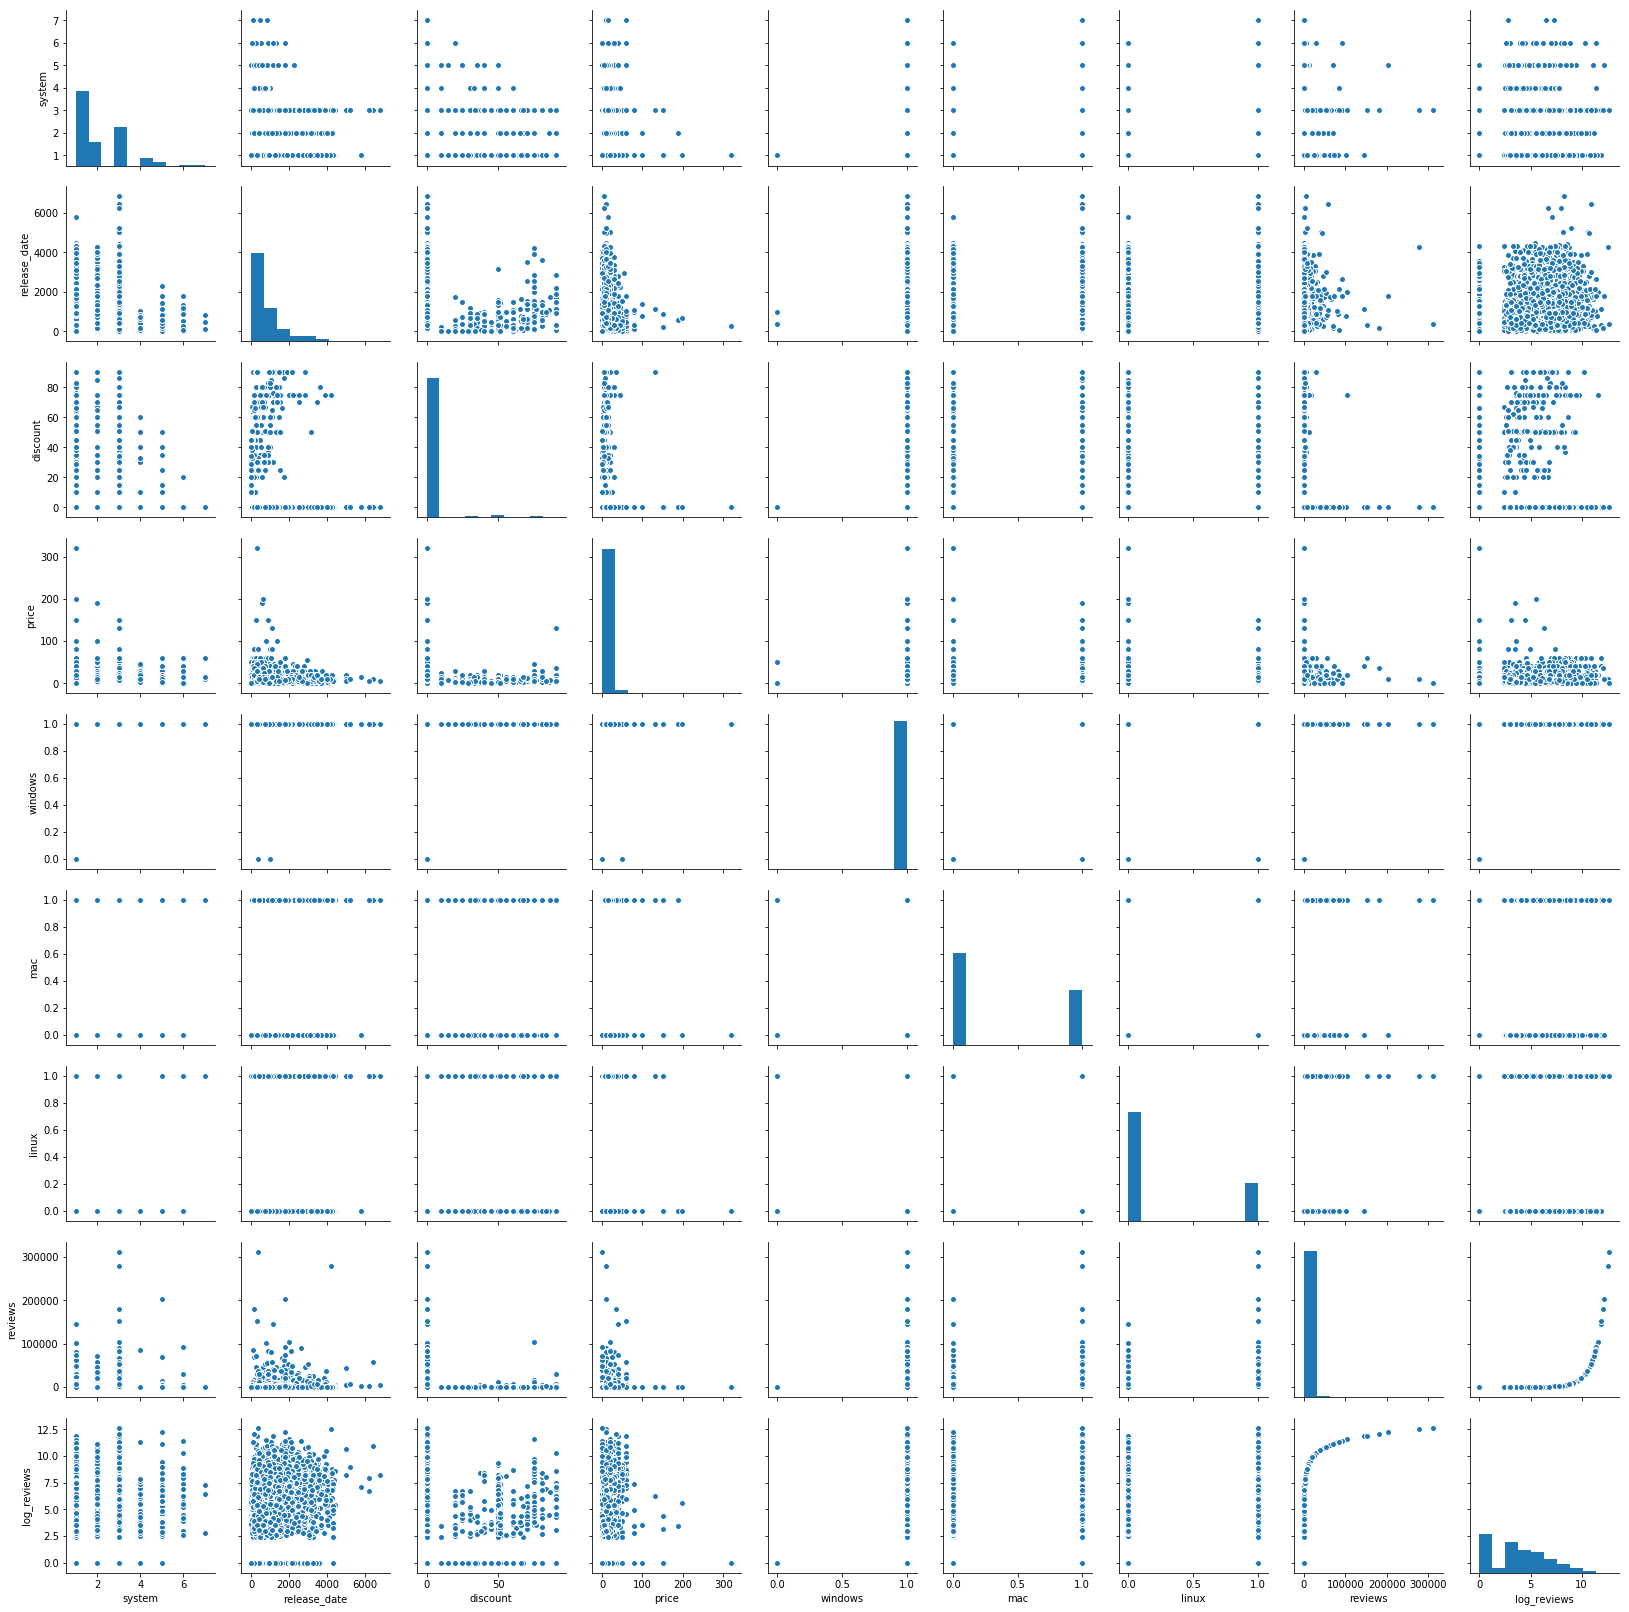

In [48]:
sns.pairplot(no_out_train)

In [49]:
no_out_train.corr()

,system,release_date,discount,price,windows,mac,linux,reviews,log_reviews
system,1.000000,-0.076351,-0.030390,0.050616,0.016204,0.503599,0.539099,0.049332,0.082811
release_date,-0.076351,1.000000,-0.011904,0.061062,0.003228,0.081065,0.052175,0.135261,0.410214
discount,-0.030390,-0.011904,1.000000,-0.025480,0.004366,0.001334,0.013059,-0.005283,0.024419
price,0.050616,0.061062,-0.025480,1.000000,-0.025915,0.023353,0.022826,0.117644,0.265197
windows,0.016204,0.003228,0.004366,-0.025915,1.000000,-0.005011,-0.010490,0.003220,0.025357
mac,0.503599,0.081065,0.001334,0.023353,-0.005011,1.000000,0.658482,0.073209,0.201598
linux,0.539099,0.052175,0.013059,0.022826,-0.010490,0.658482,1.000000,0.091087,0.198630
reviews,0.049332,0.135261,-0.005283,0.117644,0.003220,0.073209,0.091087,1.000000,0.355295
log_reviews,0.082811,0.410214,0.024419,0.265197,0.025357,0.201598,0.198630,0.355295,1.000000


# Regression on Log Values

In [50]:
y2 = no_out_train['log_reviews']
X2 = no_out_train.drop(['log_reviews'], axis = 1)

model2 = sm.OLS(y2, sm.add_constant(X2))
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_reviews   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     337.9
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:20:30   Log-Likelihood:                -12373.
No. Observations:                5442   AIC:                         2.476e+04
Df Residuals:                    5433   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.6431      1.666     -1.587      0.113      -5.908       0.622
system          -0.0320      0.035     -0.915      0.360      -0.100       0.037
release_date     0.0011    3.7e-05     30.643      0.000       0.001       0.001
discount         0.0073      0.002      3.010      0.003       0.003       0.012
price            0.0529      0.003     18.776      0.000       0.047       0.058
windows          4.5565      1.665      2.736      0.006       1.292       7.821
mac              0.5386      0.091      5.950      0.000       0.361       0.716
linux            0.6442      0.102      6.301      0.000       0.444       0.845
reviews       8.172e-05   3.44e-06     23.774      0.000     7.5e-05    8.85e-05
==============================================================================
Omnibus:                      292.774   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.814
Skew:                          -0.388   Prob(JB):                    2.50e-125
Kurtosis:                       4.389   Cond. No.                     7.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
y_traindf_no_out=pd.DataFrame(y2)
X_traindf_no_out=pd.DataFrame(X2)
diagnostic_plots.diagnostic_plots(X_traindf_no_out, y_traindf_no_out, fit)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

<Figure size 432x288 with 0 Axes>

# Regularize

In [ ]:
alphas = [10**x for x in range(-12, 5)]
scores = np.zeros((len(alphas),1))

In [ ]:
for j in range(len(alphas)):
    kf_score = []
    for train, test in kf:
        X_train = X.iloc[train]
        y_train = y.iloc[train]
        X_test = X.iloc[test]
        y_test = y.iloc[test]
        std_scaler = preprocessing.StandardScaler()
        X_train_norm = std_scaler.fit_transform(X_train)
        X_test_norm = std_scaler.transform(X_test)
    
        model =  Lasso(alpha = alphas[j])
        model.fit(X_train_norm, y_train)
        y_test_predict = model.predict(X_test_norm)
        score = mean_squared_error(y_test_predict, y_test)
        kf_score.append(score)
    scores[j] = np.mean(kf_score)
print ('mse for all alpha values \n')
print (pd.DataFrame(list(zip(alphas, scores)), columns=['alpha', 'mse']))

In [ ]:
best_alpha = alphas[scores.argmin()]
print ('alpha:', best_alpha)

In [ ]:
std_scaler = preprocessing.StandardScaler()
X_norm = std_scaler.fit_transform(X)

final_model =  Lasso(alpha = best_alpha)
final_model.fit(X_norm, y)
y_predict = final_model.predict(X_norm)
final_model_score = mean_squared_error(y_predict, y)
print ('MSE:', final_model_score)

In [ ]:
df_coef = pd.DataFrame(list(zip(X.columns, final_model.coef_)), columns = ['variable', 'coefficient'])
print ('Keep')
print (df_coef[df_coef['coefficient']!=0])

In [ ]:
print ('Drop')
print (df_coef[df_coef['coefficient']==0])

# More Complicated Models

In [22]:
def get_scores(X, y, folds = 10, alpha = 0.5): 

    models = {}
    parameters = {}
    
    models['linear_model'] = linear_model.LinearRegression()
    models['ridge_model'] = linear_model.Ridge()
    models['lasso_model'] = linear_model.Lasso(alpha=alpha)
    models['robust_regression'] = linear_model.SGDRegressor(loss='huber',max_iter=2000)
    models['eps_insensitive'] = linear_model.SGDRegressor(loss='epsilon_insensitive',max_iter=2000)
    models['cart'] = tree.DecisionTreeRegressor(max_depth=7)
    models['extratrees'] = tree.ExtraTreeRegressor(max_depth=7)
    models['randomForest'] = ensemble.RandomForestRegressor()
    models['adaboostedTrees'] = ensemble.AdaBoostRegressor()
    models['gradboostedTrees'] = ensemble.GradientBoostingRegressor()
    
    score_list = []
    for name,model in models.items():
        scores = model_selection.cross_val_score(model, X, y, 
                                                 cv = folds, n_jobs=1, scoring="r2")  
        score_list.append(np.mean(scores))

    scores_df = pd.DataFrame({'Model': list(models.keys()),
                             'Scores': score_list})

    return scores_df

In [23]:
get_scores(X_train,y_train, folds = 10, alpha = 0.5)

,Model,Scores
0,linear_model,-0.056579
1,ridge_model,-0.056486
2,lasso_model,-0.056538
3,robust_regression,-0.026112
4,eps_insensitive,-0.010786
5,cart,-0.286888
6,extratrees,-1.397121
7,randomForest,-7.086339
8,adaboostedTrees,-6.371006
9,gradboostedTrees,-1.489092


In [24]:
get_scores(X2, y2, folds = 10, alpha = 0.5)

,Model,Scores
0,linear_model,-6.928054e-01
1,ridge_model,-6.934825e-01
2,lasso_model,-8.260424e-01
3,robust_regression,-2.792336e+09
4,eps_insensitive,-1.998266e+11
5,cart,9.998046e-01
6,extratrees,5.345593e-01
7,randomForest,9.998840e-01
8,adaboostedTrees,9.982441e-01
9,gradboostedTrees,9.998547e-01


# Run RandomForest on Test

# Compare to Actual Values- Scores and Plotting